In [1]:
# ignore warining
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import time
import numpy as np

In [2]:
!unzip data13.zip

Archive:  data13.zip
  inflating: 행정_법정동 중심좌표.xlsx  
  inflating: test.csv                
  inflating: train.csv               
  inflating: submission_sample.csv   
  inflating: bus_bts.csv             


In [3]:
!pip install selenium
!apt-get update # apt install을 정확히 실행하기 위해 설치된 패키지 업데이트
!apt install chromium-chromedriver #패키지 설치
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 4.1MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [44.4 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:12 https://developer.download.nvidia.com/compute/cuda

##selenium을 통한 날씨데이터 크롤링

In [4]:
#sys.path.insert : 다른 폴더(경로)에 있는 python 파일 import 가능하도록
#경로를 환경변수로 지정 --> 경로를 환경변수로 설정하게 해주면 그 경로 안의 프로그램을 실행시킬 때 마다
#경로를 매번 입력하지 않아도 된다.

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')


In [5]:
from selenium import webdriver
#chrome의 option 설정
'''
Chrome Headless 
: Chrome 브라우저를 GUI 없이 사용할 수 있는 모드
리눅스 서버와 같이 GUI를 제공하지 않는 환경에서 '--no-sandbox' 옵션 추가
disable-dev-shm-usage도 마찬가지로 GUI를 사용할 수 없어서 추가하는 것 같다.
참고 : https://go-madhat.github.io/chrome-headless/
'''
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #chrome 창이 나오지 않게 해준다.
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#1등 코드에서의 browser == driver
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

In [6]:
import pandas as pd
import time

weather_data_10 = pd.DataFrame(columns = ['현재일기_10','현재기온_10','체감온도_10','일강수_10'])
url = 'http://www.weather.go.kr/weather/observation/currentweather.jsp?auto_man=m&type=t99&reg=184&tm=2019.10.25.16%3A00&x=19&y=7'
driver.get(url)

for i in range(0, 46):
  i+=1

  #id를 찾고 그 공간을 비운 후 새로운 값을 넣어준다 (날짜값,10시)
  elem = driver.find_element_by_id('observation_text')
  elem.clear()
  #2019년 9월 1일부터 10월 15일 까지
  #
  elem.send_keys("2019.9.{}.10:00".format(i))

  btn = driver.find_elements_by_class_name('btn')
  btn[2].click()

  time.sleep(1)
  weathers = driver.find_elements_by_css_selector('td')
  weather_data_10 = weather_data_10.append(pd.DataFrame([[weathers[40].text,weathers[44].text, weathers[46].text, weathers[47].text]],columns=['현재일기_10','현재기온_10','체감온도_10','일강수_10']))

print('success !')
driver.close()

success !


In [7]:
weather_data_10
weather_data_10.to_csv('weather.csv', index = False)

print('save.. !')

save.. !


In [8]:
weather=pd.read_csv("weather.csv")
weather

,현재일기_10,현재기온_10,체감온도_10,일강수_10
0,흐림,26.2,27.5,0.0
1,비 끝,22.5,26.1,25.7
2,흐림,25.4,28.6,12.1
3,약한 비 단속적,24.2,27.6,34.3
4,구름많음,27.6,30.1,0.1
5,흐림,28.4,30.9,0.0
6,소나기 끝,28.1,30.0,34.3
7,흐림,25.3,28.5,0.0
8,약한 비 연속적,27.3,30.6,21.9
9,구름조금,28.6,29.9,


In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
bts = pd.read_csv("bus_bts.csv")

weekday : 요일

In [10]:
train['date'] = pd.to_datetime(train['date'])
train['weekday'] = train['date'].dt.weekday

test['date'] = pd.to_datetime(test['date'])
test['weekday'] = test['date'].dt.weekday



bus_route_id+station_code = route_station

In [11]:
train['bus_route_id'] = train['bus_route_id'].astype(str)
train['station_code'] = train['station_code'].astype(str)
train['route_station'] = train['bus_route_id'] + ',' + train['station_code']

test['bus_route_id'] = test['bus_route_id'].astype(str)
test['station_code'] = test['station_code'].astype(str)
test['route_station'] = test['bus_route_id'] + ',' + test['station_code']

bus_route_id + weekday=bus_route_id_weekday

In [12]:
train['bus_route_id_weekday'] = train['bus_route_id'].astype(str) + ',' + train['weekday'].astype(str) 
test['bus_route_id_weekday'] = test['bus_route_id'].astype(str) + ',' + test['weekday'].astype(str) 


station_code + weekday=station_code_weekday

In [13]:
train['station_code_weekday'] = train['station_code'].astype(str) + ',' + train['weekday'].astype(str)
test['station_code_weekday'] = test['station_code'].astype(str) + ',' + test['weekday'].astype(str)


route_station_weekday = route_station + weekay

In [14]:
train['route_station_weekday'] = train['route_station'].astype(str) + ',' + train['weekday'].astype(str) 
test['route_station_weekday'] = test['route_station'].astype(str) + ',' + test['weekday'].astype(str)


bts.csv 데이터에서 geton_time 열에서 시간대만 추출하여 on_time 컬럼을 만듬

In [15]:
bts['on_time']  = bts['geton_time'].apply(lambda x : x[:2])

In [16]:
bts['on_time'].unique()

array(['06', '07', '09', '08', '10', '11'], dtype=object)

query 메소드

  장점: 가독성과 편의성
  
  단점은 .loc[ ] 로 구현한 것보다 속도가 느림

In [17]:
bts.iloc[bts.query('on_time == "06"').index,13] = '6~7_ride'
bts.iloc[bts.query('on_time == "07"').index,13] = '7~8_ride'
bts.iloc[bts.query('on_time == "08"').index,13] = '8~9_ride'
bts.iloc[bts.query('on_time == "09"').index,13] = '9~10_ride'
bts.iloc[bts.query('on_time == "10"').index,13] = '10~11_ride'
bts.iloc[bts.query('on_time == "11"').index,13] = '11~12_ride'

target data는 18시~20시 의 값(2시간 간격)이므로 모든 데이터도 2시간 간격을 merge

In [18]:
train['68a']=train['6~7_ride']+train['7~8_ride'] 
train['810a']=train['8~9_ride']+train['9~10_ride']
train['1012a']=train['10~11_ride']+train['11~12_ride']

train['68b']=train['6~7_takeoff']+train['7~8_takeoff'] 
train['810b']=train['8~9_takeoff']+train['9~10_takeoff']
train['1012b']=train['10~11_takeoff']+train['11~12_takeoff']

test['68a']=test['6~7_ride']+test['7~8_ride']
test['810a']=test['8~9_ride']+test['9~10_ride']
test['1012a']=test['10~11_ride']+test['11~12_ride']

test['68b']=test['6~7_takeoff']+test['7~8_takeoff']
test['810b']=test['8~9_takeoff']+test['9~10_takeoff']
test['1012b']=test['10~11_takeoff']+test['11~12_takeoff']

##mean, sum 의 통계량

각각 노선, 정류장별로 패턴이 생길수 있으므로
노선, 정류장  별로 합과 평균값 통계량을 낸다.

test데이터는 18~20_ride 값이 없으므로 train 데이터를 쓴다

id : route_station, bus_route_id, station_code, weekday

NA 값이 생기는 이유는 train set에 없는 bus_route_id, station_name이 존재하기 때문이다

In [19]:
def id_statistic(ID, col1, col2) :
    
    # mean, sum
    rs_mean = train.groupby([ID])['18~20_ride'].agg([(col1, 'mean')]).reset_index()
    rs_sum = train.groupby([ID])['18~20_ride'].agg([(col2, 'sum')]).reset_index()
    rs_mean_sum = pd.merge(rs_mean, rs_sum, on=ID)

    # merge
    tr = pd.merge(train, rs_mean_sum, how='left', on=ID)
    te = pd.merge(test, rs_mean_sum, how='left', on=ID)

    # nan값은 평균으로 채운다
    te[col1] = te[col1].fillna(rs_mean.mean())
    te[col1] = te[col1].fillna(rs_sum.mean())
    
    return tr, te

In [20]:
train, test = id_statistic('route_station', '1820_rs_mean', '1820_rs_sum')

train, test = id_statistic('bus_route_id', '1820_r_mean', '1820_r_sum')

train, test = id_statistic('station_code', '1820_s_mean', '1820_s_sum')

train, test = id_statistic('weekday', '1820_w_mean', '1820_w_sum')

agg() 함수 실행 예시

In [38]:
 f = train.groupby(['bus_route_id_weekday'])['18~20_ride'].agg([('mean_bus_weekday_ride','mean')]).reset_index()
 f

,bus_route_id_weekday,mean_bus_weekday_ride
0,"17010000,0",0.000000
1,"17010000,1",0.500000
2,"17010000,2",0.500000
3,"17010000,3",0.000000
4,"17010000,4",0.000000
...,...,...
3959,"8180000,2",2.339623
3960,"8180000,3",1.545455
3961,"8180000,4",1.188679
3962,"8180000,5",1.265306


In [39]:
j = train.groupby(['route_station'])['1820_rs_sum'].agg({'sum', 'mean'}).reset_index()
j

,route_station,sum,mean
0,"17010000,6000027",96.0,4.0
1,"20010000,6115000",2610.0,90.0
2,"20010000,6115001",138.0,6.0
3,"20010000,6115002",45.0,3.0
4,"20010000,6115003",207.0,9.0
...,...,...,...
29428,"8180000,3081",2262.0,78.0
29429,"8180000,3087",0.0,0.0
29430,"8180000,320",280.0,10.0
29431,"8180000,3372",3596.0,124.0


In [21]:
def mean_statistics() :

    f = train.groupby(['bus_route_id_weekday'])['18~20_ride'].agg([('mean_bus_weekday_ride','mean')]).reset_index()
    tr = pd.merge(train, f, how='left', on='bus_route_id_weekday')
    te = pd.merge(test, f, how='left', on='bus_route_id_weekday').fillna(f['mean_bus_weekday_ride'].mean())
    
    f = train.groupby(['station_code_weekday'])['18~20_ride'].agg([('mean_station_weekday_ride','mean')]).reset_index()
    tr = pd.merge(tr, f, how='left', on='station_code_weekday')
    te = pd.merge(te, f, how='left', on='station_code_weekday').fillna(f['mean_station_weekday_ride'].mean())
    
    f = train.groupby(['route_station_weekday'])['18~20_ride'].agg([('mean_route_station_weekday_ride','mean')]).reset_index()
    tr = pd.merge(tr, f, how='left', on='route_station_weekday')
    te = pd.merge(te, f, how='left', on='route_station_weekday').fillna(f['mean_route_station_weekday_ride'].mean())
    
    return tr, te

In [22]:
train, test = mean_statistics()

##혼잡도
bus_route_id를 기준으로 18 ~ 20의 혼잡도 계산 

In [23]:
def congestion() :
    df = train.groupby(['bus_route_id'])['18~20_ride'].agg([('passenger', 'sum')])
    df = df.sort_values(by='passenger', ascending=False).reset_index()
    
    def f(x):
        if x > 10000:
            return 7

        elif x > 5000:
            return 6

        elif x > 2000:
            return 5

        elif x > 700:
            return 4

        elif x > 200:
            return 3

        elif x > 50:
            return 2

        else:
            return 1
    
    df['congestion']=df['passenger'].apply(f)
    df = df[['bus_route_id','congestion']]
    
    tr = pd.merge(train, df, how='left', on='bus_route_id')
    te = pd.merge(test, df, how='left', on='bus_route_id')
    
    # 결측치는 데이터 프레임 df의 'congestion'의 중간값인 '4'으로 대체
    te = te.fillna(4)
    
    return tr, te

In [24]:
train, test = congestion()

location 

In [25]:
train['location'] = train['latitude'].astype(str) + ',' + train['longitude'].astype(str)
test['location'] = test['latitude'].astype(str) + ',' + test['longitude'].astype(str)

train 인지 test인지 구분하기 위해 (0: train, 1 :test)

In [26]:
# make cue column
train['cue']=0
test['cue']=1

In [27]:
#concat : 단순히 위아래로 합치기
data = pd.concat([train, test])
data

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,mean_bus_weekday_ride,mean_station_weekday_ride,mean_route_station_weekday_ride,congestion,location,cue
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,3.132812,0.200000,0.2,5.0,"33.4899,126.49373",0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,3.132812,3.154867,2.2,5.0,"33.48944,126.48508",0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6,"4270000,432","4270000,6","432,6","4270000,432,6",2.0,2.0,0.0,0.0,0.0,0.0,1.600000,48.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,3.132812,1.163462,0.8,5.0,"33.48181,126.47352",0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6,"4270000,1579","4270000,6","1579,6","4270000,1579,6",17.0,32.0,30.0,0.0,0.0,0.0,53.766667,1613.0,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,3.132812,56.000000,56.0,5.0,"33.50577,126.49252",0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,"4270000,1646","4270000,6","1646,6","4270000,1646,6",0.0,0.0,0.0,0.0,1.0,0.0,0.153846,4.0,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,3.132812,1.108108,0.4,5.0,"33.255790000000005,126.4126",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,786","32820000,2","786,2","32820000,786,2",0.0,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.806763,167.0,1.430856,88404.0,0.000000,1.035714,0.0,1.0,"33.30073,126.18044",1
228166,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,1080","32820000,2","1080,2","32820000,1080,2",0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.456067,109.0,1.430856,88404.0,0.000000,0.472222,0.0,1.0,"33.46262,126.33447",1
228167,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,1129","32820000,2","1129,2","32820000,1129,2",3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.393089,1108.0,1.430856,88404.0,0.000000,2.457143,0.0,1.0,"33.41437,126.26336",1
228168,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,1564","32820000,2","1564,2","32820000,1564,2",3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,7.726008,5555.0,1.430856,88404.0,0.000000,9.442105,0.0,1.0,"33.49946,126.51479",1


'bus_route_id','station_code', 'route_station_weekday', 'route_station' 

Label encodeing

In [29]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_encode = data[['bus_route_id','station_code', 'route_station_weekday', 'route_station']]
df_encoded = df_encode.apply(labelencoder.fit_transform)

data['bus_route_id2']=df_encoded['bus_route_id']
data['station_code2']=df_encoded['station_code']
data['route_station_weekday2']=df_encoded['route_station_weekday']
data['route_station2']=df_encoded['route_station']

data.shape

(643593, 50)

##날씨 데이터 

In [30]:
data.date.unique()

array(['2019-09-01T00:00:00.000000000', '2019-09-02T00:00:00.000000000',
       '2019-09-03T00:00:00.000000000', '2019-09-04T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-09-06T00:00:00.000000000',
       '2019-09-07T00:00:00.000000000', '2019-09-08T00:00:00.000000000',
       '2019-09-09T00:00:00.000000000', '2019-09-10T00:00:00.000000000',
       '2019-09-11T00:00:00.000000000', '2019-09-12T00:00:00.000000000',
       '2019-09-13T00:00:00.000000000', '2019-09-14T00:00:00.000000000',
       '2019-09-15T00:00:00.000000000', '2019-09-16T00:00:00.000000000',
       '2019-09-17T00:00:00.000000000', '2019-09-18T00:00:00.000000000',
       '2019-09-19T00:00:00.000000000', '2019-09-20T00:00:00.000000000',
       '2019-09-21T00:00:00.000000000', '2019-09-22T00:00:00.000000000',
       '2019-09-23T00:00:00.000000000', '2019-09-24T00:00:00.000000000',
       '2019-09-25T00:00:00.000000000', '2019-09-26T00:00:00.000000000',
       '2019-09-27T00:00:00.000000000', '2019-09-28

In [31]:
def weather() :

    weather_data = pd.read_csv('weather.csv', encoding = 'utf-8')
    weather_data['id'] = range(0,46)

    a = pd.DataFrame(data.date.unique(), columns=['date'])
    a['id'] = range(0,46)
    weather_data = pd.merge(a, weather_data)
    weather_data = weather_data[['date','현재일기_10','체감온도_10','일강수_10']]
    weather_data = weather_data.replace(' ', 0)
    df = pd.merge(data, weather_data, on='date')
    # label_encoder
    labelencoder = LabelEncoder()
    df_encode = df[['현재일기_10']]
    df_encoded = df_encode.apply(labelencoder.fit_transform)
    df['현재일기_10']=df_encoded['현재일기_10']
    # object->float 변수변환
    df['현재일기_10'] = df['현재일기_10'].astype(float)
    df['체감온도_10'] = df['체감온도_10'].astype(float)
    df['일강수_10'] = df['일강수_10'].astype(float)
    return df



---


함수 내용 출력해보기

In [76]:
weather_data = pd.merge(a, weather_data)
weather_data = weather_data[['date','현재일기_10','체감온도_10','일강수_10']]
weather_data = weather_data.replace(' ', 0)
df = pd.merge(data, weather_data, on='date')

In [77]:
df

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,mean_bus_weekday_ride,mean_station_weekday_ride,mean_route_station_weekday_ride,congestion,location,cue,bus_route_id2,station_code2,route_station_weekday2,route_station2,현재일기_10,체감온도_10,일강수_10
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,3.132812,0.200000,0.2,5.0,"33.4899,126.49373",0,625,2499,161004,31053,흐림,27.5,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,3.132812,3.154867,2.2,5.0,"33.48944,126.48508",0,625,2618,161011,31054,흐림,27.5,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6,"4270000,432","4270000,6","432,6","4270000,432,6",2.0,2.0,0.0,0.0,0.0,0.0,1.600000,48.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,3.132812,1.163462,0.8,5.0,"33.48181,126.47352",0,625,2976,161026,31057,흐림,27.5,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6,"4270000,1579","4270000,6","1579,6","4270000,1579,6",17.0,32.0,30.0,0.0,0.0,0.0,53.766667,1613.0,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,3.132812,56.000000,56.0,5.0,"33.50577,126.49252",0,625,587,160799,31020,흐림,27.5,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,"4270000,1646","4270000,6","1646,6","4270000,1646,6",0.0,0.0,0.0,0.0,1.0,0.0,0.153846,4.0,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,3.132812,1.108108,0.4,5.0,"33.255790000000005,126.4126",0,625,652,160813,31022,흐림,27.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,786","32820000,2","786,2","32820000,786,2",0.0,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.806763,167.0,1.430856,88404.0,0.000000,1.035714,0.0,1.0,"33.30073,126.18044",1,624,3396,160774,31016,구름많음,19.5,0
643589,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,1080","32820000,2","1080,2","32820000,1080,2",0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.456067,109.0,1.430856,88404.0,0.000000,0.472222,0.0,1.0,"33.46262,126.33447",1,624,83,160707,31001,구름많음,19.5,0
643590,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,1129","32820000,2","1129,2","32820000,1129,2",3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.393089,1108.0,1.430856,88404.0,0.000000,2.457143,0.0,1.0,"33.41437,126.26336",1,624,137,160714,31002,구름많음,19.5,0
643591,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2,"32820000,1564","32820000,2","1564,2","32820000,1564,2",3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,7.726008,5555.0,1.430856,88404.0,0.000000,9.442105,0.0,1.0,"33.49946,126.51479",1,624,571,160721,31003,구름많음,19.5,0




---



In [32]:
data = weather()

weekday를 one-hot-encoding(get_dummies함수)으로

In [33]:
data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.weekday
data = pd.get_dummies(data,columns=['weekday'])
data['weekday'] = data['date'].dt.weekday
data

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,mean_bus_weekday_ride,mean_station_weekday_ride,mean_route_station_weekday_ride,congestion,location,cue,bus_route_id2,station_code2,route_station_weekday2,route_station2,현재일기_10,체감온도_10,일강수_10,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,3.132812,0.200000,0.2,5.0,"33.4899,126.49373",0,625,2499,161004,31053,9.0,27.5,0.0,0,0,0,0,0,0,1,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,3.132812,3.154867,2.2,5.0,"33.48944,126.48508",0,625,2618,161011,31054,9.0,27.5,0.0,0,0,0,0,0,0,1,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"4270000,432","4270000,6","432,6","4270000,432,6",2.0,2.0,0.0,0.0,0.0,0.0,1.600000,48.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,3.132812,1.163462,0.8,5.0,"33.48181,126.47352",0,625,2976,161026,31057,9.0,27.5,0.0,0,0,0,0,0,0,1,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,"4270000,1579","4270000,6","1579,6","4270000,1579,6",17.0,32.0,30.0,0.0,0.0,0.0,53.766667,1613.0,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,3.132812,56.000000,56.0,5.0,"33.50577,126.49252",0,625,587,160799,31020,9.0,27.5,0.0,0,0,0,0,0,0,1,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"4270000,1646","4270000,6","1646,6","4270000,1646,6",0.0,0.0,0.0,0.0,1.0,0.0,0.153846,4.0,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,3.132812,1.108108,0.4,5.0,"33.255790000000005,126.4126",0,625,652,160813,31022,9.0,27.5,0.0,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,"32820000,786","32820000,2","786,2","32820000,786,2",0.0,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.806763,167.0,1.430856,88404.0,0.000000,1.035714,0.0,1.0,"33.30073,126.18044",1,624,3396,160774,31016,0.0,19.5,0.0,0,0,1,0,0,0,0,2
643589,643589,2019-10-16,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,"32820000,1080","32820000,2","1080,2","32820000,1080,2",0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.456067,109.0,1.430856,88404.0,0.000000,0.472222,0.0,1.0,"33.46262,126.33447",1,624,83,160707,31001,0.0,19.5,0.0,0,0,1,0,0,0,0,2
643590,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"32820000,1129","32820000,2","1129,2","32820000,1129,2",3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.393089,1108.0,1.430856,88404.0,0.000000,2.457143,0.0,1.0,"33.41437,126.26336",1,624,137,160714,31002,0.0,19.5,0.0,0,0,1,0,0,0,0,2
643591,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"32820000,1564","32820000,2","1564,2","32820000,1564,2",3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.

in-out label-encoding

In [34]:
data['in_out'].value_counts()
data['in_out'] = data['in_out'].map({'시내':0,'시외':1})

In [35]:
data['in_out']

0         1
1         1
2         1
3         0
4         0
         ..
643588    0
643589    0
643590    0
643591    0
643592    0
Name: in_out, Length: 643593, dtype: int64

#위도경도를 이용한 거리 계산

  geopy의 vincenty 방식사용

  제주시, 제주시청 ,제주국제공항, 한라병원

In [36]:
!pip install geopy

import geopy.distance

In [37]:
coords_jejusi = (33.500770, 126.522761) #제주시의 위도 경도
data['dis_jejusi'] = [geopy.distance.vincenty((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejusi).km for i in range(len(data))]

In [38]:
coords_jejusicheong1 = (33.49892, 126.53035) #제주시청(광양방면)의 위도 경도
data['dis_jejusicheong1'] = [geopy.distance.vincenty((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(data))]

coords_jejuairport = (33.50661, 126.49345) #제주국제공항(구제주방면)의 위도 경도
data['dis_jejuairport'] = [geopy.distance.vincenty((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejuairport).km for i in range(len(data))]

coords_hallahosp = (33.48963, 126.486) #한라병원의 위도 경도
data['dis_hallahosp'] = [geopy.distance.vincenty((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_hallahosp).km for i in range(len(data))]

In [39]:
data

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,mean_bus_weekday_ride,mean_station_weekday_ride,mean_route_station_weekday_ride,congestion,location,cue,bus_route_id2,station_code2,route_station_weekday2,route_station2,현재일기_10,체감온도_10,일강수_10,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,dis_jejusi,dis_jejusicheong1,dis_jejuairport,dis_hallahosp
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,3.132812,0.200000,0.2,5.0,"33.4899,126.49373",0,625,2499,161004,31053,9.0,27.5,0.0,0,0,0,0,0,0,1,6,2.954920,3.547051,1.853545,0.719000
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,3.132812,3.154867,2.2,5.0,"33.48944,126.48508",0,625,2618,161011,31054,9.0,27.5,0.0,0,0,0,0,0,0,1,6,3.720275,4.336294,2.057088,0.088058
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"4270000,432","4270000,6","432,6","4270000,432,6",2.0,2.0,0.0,0.0,0.0,0.0,1.600000,48.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,3.132812,1.163462,0.8,5.0,"33.48181,126.47352",0,625,2976,161026,31057,9.0,27.5,0.0,0,0,0,0,0,0,1,6,5.036124,5.611975,3.316057,1.448297
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,"4270000,1579","4270000,6","1579,6","4270000,1579,6",17.0,32.0,30.0,0.0,0.0,0.0,53.766667,1613.0,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,3.132812,56.000000,56.0,5.0,"33.50577,126.49252",0,625,587,160799,31020,9.0,27.5,0.0,0,0,0,0,0,0,1,6,2.864166,3.596334,0.127071,1.889890
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"4270000,1646","4270000,6","1646,6","4270000,1646,6",0.0,0.0,0.0,0.0,1.0,0.0,0.153846,4.0,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,3.132812,1.108108,0.4,5.0,"33.255790000000005,126.4126",0,625,652,160813,31022,9.0,27.5,0.0,0,0,0,0,0,0,1,6,29.040353,29.106917,28.818039,26.819826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,"32820000,786","32820000,2","786,2","32820000,786,2",0.0,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.806763,167.0,1.430856,88404.0,0.000000,1.035714,0.0,1.0,"33.30073,126.18044",1,624,3396,160774,31016,0.0,19.5,0.0,0,0,1,0,0,0,0,2,38.812248,39.278671,37.003528,35.313984
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,"32820000,1080","32820000,2","1080,2","32820000,1080,2",0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.456067,109.0,1.430856,88404.0,0.000000,0.472222,0.0,1.0,"33.46262,126.33447",1,624,83,160707,31001,0.0,19.5,0.0,0,0,1,0,0,0,0,2,18.004435,18.645560,15.560168,14.399491
643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"32820000,1129","32820000,2","1129,2","32820000,1129,2",3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.393089,1108.0,1.430856,884

출근시간의 총 승차 승객 수와 하차 승객 수 

In [40]:
data['ride_sum'] = data['6~7_ride'] + data['7~8_ride'] + data['8~9_ride'] + data['9~10_ride'] + data['10~11_ride'] + data['11~12_ride'] 
data['takeoff_sum'] = data['6~7_takeoff'] + data['7~8_takeoff'] + data['8~9_takeoff'] + data['9~10_takeoff'] + data['10~11_takeoff'] + data['11~12_takeoff'] 

주말과 연휴 

In [41]:
def h(x):
    if x ==5:
        return 1
    elif x==6:
        return 1
    else:
        return 0

data['weekend'] = data['weekday'].apply(h)



def g(x):
    holiday=['2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09']
    holiday=pd.to_datetime(holiday,format='%Y-%m-%d')
    
    if x in holiday:
        return 1
    else:
        return 0



data['holiday'] = data['date'].apply(g) 



In [42]:
data['holiday'].unique()

array([0, 1])

'고등학교','대학교','공항','터미널'가 포함된 정류장->승하차 인원이 많을 것으로 예상

In [43]:
g = data[data['station_name'].str.contains('고등학교')]
highschool = list(g['station_name'].unique())


g = data[data['station_name'].str.contains('대학교')]
university = list(g['station_name'].unique())

g = data[data['station_name'].str.contains('환승')]
transfer = list(g['station_name'].unique())

g = data[data['station_name'].str.contains('공항')]
airport = list(g['station_name'].unique())

g = data[data['station_name'].str.contains('터미널')]
terminal = list(g['station_name'].unique())



In [44]:
def f(x):
    if x in transfer:
        return 1
    elif x in airport:
        return 1
    elif x in terminal:
        return 1
    elif x in highschool:
        return 1
    elif x in university:
        return 1
    else:
        return 0

In [45]:
data['school_or_transfer'] = data['station_name'].apply(f) 


강수량 여부->이정민님 데이터 참고

In [47]:
rain3=pd.read_csv("제주시_강수량_공공데이터.csv",engine='python')
rain3

,��¥,����,������(mm)
0,2019-09-01,184,26.1
1,2019-09-02,184,25.7
2,2019-09-03,184,13.9
3,2019-09-04,184,43.0
4,2019-09-05,184,7.0
...,...,...,...
56,2019-10-27,184,NaN
57,2019-10-28,184,NaN
58,2019-10-29,184,NaN
59,2019-10-30,184,NaN


In [48]:
rain3.columns

Index(['��¥', '����', '������(mm)'], dtype='object')

In [49]:
rain3 = rain3.rename(columns={"��¥":"date","����":"dist_name","������(mm)":"rain"})
rain3

,date,dist_name,rain
0,2019-09-01,184,26.1
1,2019-09-02,184,25.7
2,2019-09-03,184,13.9
3,2019-09-04,184,43.0
4,2019-09-05,184,7.0
...,...,...,...
56,2019-10-27,184,NaN
57,2019-10-28,184,NaN
58,2019-10-29,184,NaN
59,2019-10-30,184,NaN


In [50]:
rain3.dist_name.unique()

array([184])

In [51]:
rain3 = rain3.fillna(0.00000)
rain3['date'] = pd.to_datetime(rain3['date'])


In [52]:
rain3

,date,dist_name,rain
0,2019-09-01,184,26.1
1,2019-09-02,184,25.7
2,2019-09-03,184,13.9
3,2019-09-04,184,43.0
4,2019-09-05,184,7.0
...,...,...,...
56,2019-10-27,184,0.0
57,2019-10-28,184,0.0
58,2019-10-29,184,0.0
59,2019-10-30,184,0.0


In [53]:
data = pd.merge(data, rain3, how='left',on='date')
#data = pd.get_dummies(data,columns=['dist_name'])
data

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,mean_bus_weekday_ride,mean_station_weekday_ride,mean_route_station_weekday_ride,congestion,location,cue,bus_route_id2,station_code2,route_station_weekday2,route_station2,현재일기_10,체감온도_10,일강수_10,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,dis_jejusi,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,ride_sum,takeoff_sum,weekend,holiday,school_or_transfer,dist_name,rain
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,3.132812,0.200000,0.2,5.0,"33.4899,126.49373",0,625,2499,161004,31053,9.0,27.5,0.0,0,0,0,0,0,0,1,6,2.954920,3.547051,1.853545,0.719000,16.0,0.0,1,0,0,184,26.1
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,3.132812,3.154867,2.2,5.0,"33.48944,126.48508",0,625,2618,161011,31054,9.0,27.5,0.0,0,0,0,0,0,0,1,6,3.720275,4.336294,2.057088,0.088058,22.0,0.0,1,0,0,184,26.1
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"4270000,432","4270000,6","432,6","4270000,432,6",2.0,2.0,0.0,0.0,0.0,0.0,1.600000,48.0,3.104381,2409.0,2.169559,1625.0,1.034282,54306.0,3.132812,1.163462,0.8,5.0,"33.48181,126.47352",0,625,2976,161026,31057,9.0,27.5,0.0,0,0,0,0,0,0,1,6,5.036124,5.611975,3.316057,1.448297,4.0,0.0,1,0,0,184,26.1
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,"4270000,1579","4270000,6","1579,6","4270000,1579,6",17.0,32.0,30.0,0.0,0.0,0.0,53.766667,1613.0,3.104381,2409.0,52.032258,1613.0,1.034282,54306.0,3.132812,56.000000,56.0,5.0,"33.50577,126.49252",0,625,587,160799,31020,9.0,27.5,0.0,0,0,0,0,0,0,1,6,2.864166,3.596334,0.127071,1.889890,79.0,0.0,1,0,1,184,26.1
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"4270000,1646","4270000,6","1646,6","4270000,1646,6",0.0,0.0,0.0,0.0,1.0,0.0,0.153846,4.0,3.104381,2409.0,0.732794,181.0,1.034282,54306.0,3.132812,1.108108,0.4,5.0,"33.255790000000005,126.4126",0,625,652,160813,31022,9.0,27.5,0.0,0,0,0,0,0,0,1,6,29.040353,29.106917,28.818039,26.819826,0.0,1.0,1,0,0,184,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,"32820000,786","32820000,2","786,2","32820000,786,2",0.0,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.806763,167.0,1.430856,88404.0,0.000000,1.035714,0.0,1.0,"33.30073,126.18044",1,624,3396,160774,31016,0.0,19.5,0.0,0,0,1,0,0,0,0,2,38.812248,39.278671,37.003528,35.313984,0.0,3.0,0,0,1,184,0.0
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,"32820000,1080","32820000,2","1080,2","32820000,1080,2",0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.456067,109.0,1.430856,88404.0,0.000000,0.472222,0.0,1.0,"33.46262,126.33447",1,624,83,160707,31001,0.0,19.5,0.0,0,0,1,0,0,0,0,2,18.004435,18.645560,15.560168,14.399491,0.0,1.0,0,0,1,184,0.

비오는날 : 1   안오는날 0

In [54]:
def f(x):
    if x == 0:
        return 0
    else:
        return 1

data['rainy_day'] = data['rain'].apply(f)

concat된 데이터인 data를 train과 test로 나누기

In [55]:
train_data = data.query('cue=="0"').reset_index()
test_data = data.query('cue=="1"').reset_index()

train_data.shape, test_data.shape

((415423, 73), (228170, 73))

target 데이터 분리

In [56]:
y_train = train_data[['18~20_ride']]

In [57]:
train_data.shape

(415423, 73)

원래 1등코드는 더 많은 feature engineering을 했는데 너무 많기도 해서 생소한 python 코드가 있는 부분 위주만 진행하였습니다

In [58]:
feature=['in_out','latitude','longitude','6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride', '10~11_ride', '11~12_ride',
           '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
           'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
           'dis_jejusi', 'dis_jejusicheong1','dis_jejuairport','dis_hallahosp', 
           'weekend', 'holiday', 'ride_sum', 'takeoff_sum', '1820_rs_mean', '1820_r_mean', '1820_s_mean', 'congestion',
           'station_code2', 'bus_route_id2', '일강수_10', '현재일기_10', '체감온도_10',
           '1820_w_mean',
           '68a', '810a', '1012a', '68b', '810b', '1012b',
          '체감온도_10', 'rain',
           'dist_name','school_or_transfer','rainy_day']


In [59]:
train_data_final=train_data[feature]
test_data_final=test_data[feature]

In [60]:
train_data_final.shape,test_data_final.shape

((415423, 51), (228170, 51))

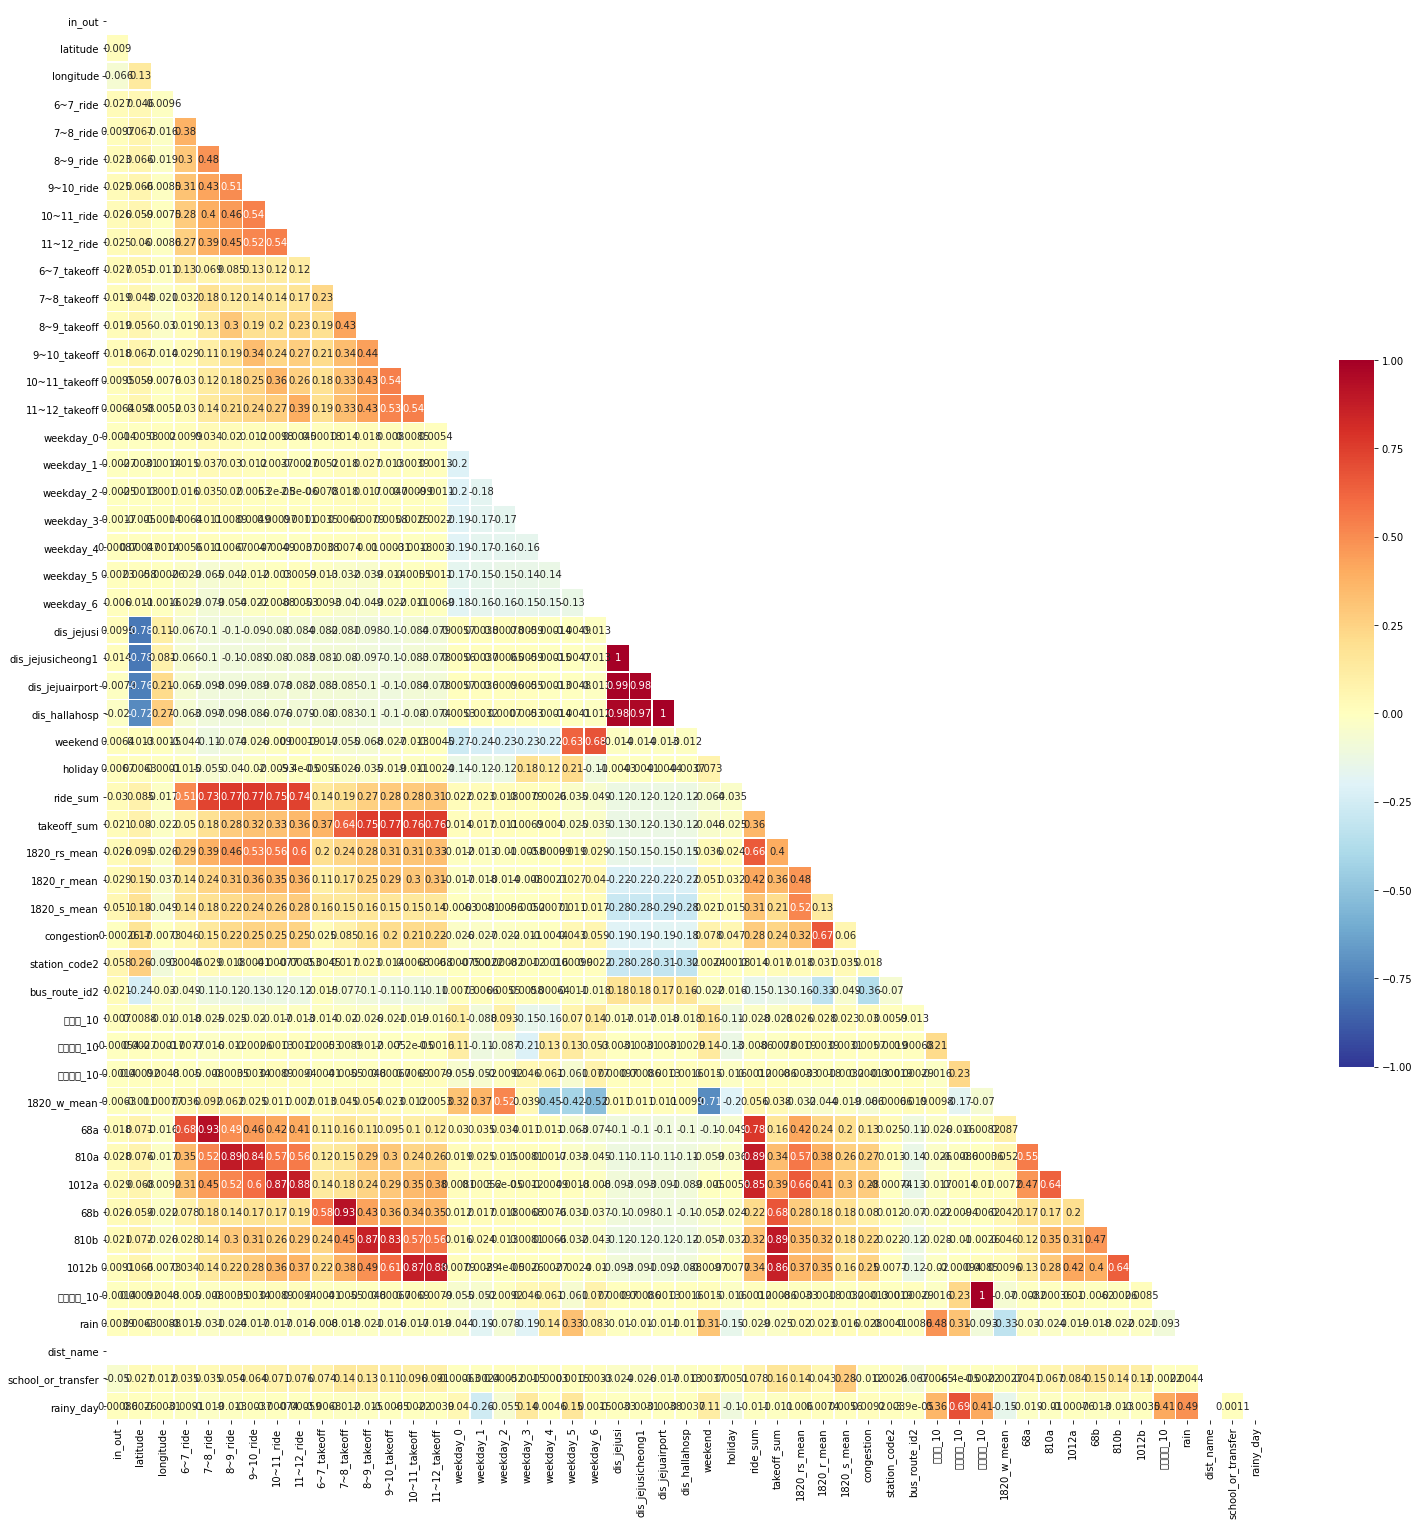

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = train_data_final.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(26,26) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
#삼각형 그리기
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [61]:
train_data_final.to_csv("train_data_final.csv",index=False)
test_data_final.to_csv("test_data_final.csv",index=False)

Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

train_final_std=scaler.fit_transform(train_data_final)
test_final_std=scaler.transform(test_data_final)

#모델 학습 및 검증
randomforest, lightgbm, xgboost, DNN

##1.lightGBM-성능:2.2411156801	

In [63]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 500,
    'learning_rate': 0.05, 
    'num_leaves': 10,
    'objective': 'regression_l2', 
    'metric': ['mae', 'mse'],
}

lgbm_model = LGBMRegressor(boosting = 'dart',
                         Metric = 'regression_l2', n_jobs=-1,
                         **params)
lgbm_model.fit(
    train_final_std,y_train,
    eval_metric=['mae', 'mse'],
    verbose=10,
)

LGBMRegressor(Metric='regression_l2', boosting='dart', boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.05, max_depth=-1, metric=['mae', 'mse'],
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=10,
              objective='regression_l2', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

score=cross_val_score(lgbm_model,train_final_std,y_train,scoring='neg_mean_squared_error',cv=10)

y_pred=lgbm_model.predict(train_final_std)

print(score.mean(),score.std())
print(mean_squared_error(y_train,y_pred))

-5.0965738119910515 1.2286941989405122
4.149126438956217


In [64]:
y_pred_lgb=lgbm_model.predict(test_final_std)

In [65]:
y_pred_lgb

array([1.70865094, 6.59781362, 1.77280982, ..., 0.0577676 , 0.0577676 ,
       0.0577676 ])

##2.DNN- 성능 : 4.0469474705	

In [83]:
import torch
import numpy as np
import torch.optim as optim

import random
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(777)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

train_x = np.array(train_final_std)
train_y = np.array(y_train)

train_x = torch.FloatTensor(train_x).to(device)
train_y = torch.FloatTensor(train_y).unsqueeze(1).to(device)

In [84]:
dataset = TensorDataset(train_x, train_y)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, drop_last=True)

In [85]:
linear1 = torch.nn.Linear(51,128,bias=True)
linear2 = torch.nn.Linear(128,128,bias=True)
linear3 = torch.nn.Linear(128, 1,bias=True)
relu = torch.nn.ReLU()

torch.nn.init.xavier_normal_(linear1.weight)
torch.nn.init.xavier_normal_(linear2.weight)
torch.nn.init.xavier_normal_(linear3.weight)

Parameter containing:
tensor([[ 1.0669e-01, -5.6207e-02, -1.5735e-01, -2.9431e-01,  1.5699e-01,
          1.6423e-01,  1.4846e-01,  1.3724e-01, -1.7572e-01,  8.2078e-02,
          2.9738e-02, -1.6104e-01, -1.3964e-01,  7.4133e-02, -3.9536e-02,
          5.2416e-02,  1.3234e-01, -2.2934e-01, -6.4458e-02, -5.9839e-02,
         -8.8782e-02, -8.5030e-02,  2.2297e-02, -1.1239e-01, -1.0315e-01,
          1.1402e-01,  5.3247e-02, -9.4270e-02, -6.9693e-02, -3.5735e-02,
          2.5950e-01,  1.8575e-02,  1.3850e-01,  2.6796e-02,  6.5591e-02,
         -2.0422e-01, -1.0800e-02, -8.7132e-02,  4.0755e-02, -4.0529e-02,
          2.8614e-03, -4.9860e-02, -5.0783e-02,  3.0679e-01,  9.2405e-02,
         -9.7603e-03,  1.4268e-02, -1.3240e-01,  7.0371e-02,  7.0083e-02,
         -1.0660e-01, -1.7702e-02,  1.4062e-01,  4.5785e-02, -4.7210e-02,
         -1.3202e-01,  1.9940e-01, -2.3599e-02, -2.8772e-01, -6.0822e-02,
          1.7316e-01,  1.3894e-01, -3.6597e-02,  4.3952e-06, -2.2550e-01,
         -1.0812

In [86]:
model = torch.nn.Sequential(linear1,relu, linear2,relu,
                            linear3).to(device)

In [87]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-6)
loss = torch.nn.MSELoss().to(device)
epochs = 5
cost_list = []
for epoch in range(epochs+1):
  
  for x,y in dataloader:

    x = x.to(device)
    y = y.to(device)

    hypothesis = model(x)
    cost = loss(hypothesis, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

  #if epoch%10 == 0:
  print('Epoch {} Cost {}'.format(epoch, cost.item()))

Epoch 0 Cost 0.9982492923736572
Epoch 1 Cost 2.064480781555176
Epoch 2 Cost 28.382780075073242
Epoch 3 Cost 2.7552945613861084
Epoch 4 Cost 1.2336010932922363
Epoch 5 Cost 1.0663954019546509


In [88]:
test_x = torch.FloatTensor(np.array(test_final_std)).to(device)

predict = model(test_x).detach()
predict = predict.cpu().numpy().reshape(-1, 1)

##3.randomforest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

randomforest=RandomForestRegressor(random_state=1)

params_randomforest={'max_depth':[3,5,7,9,11],
                 'n_estimators':[100,500,700,1000],
                 }


grid_randomforest=GridSearchCV(estimator=randomforest,
                           param_grid=params_randomforest,
                           cv=10,
                           scoring='neg_mean_squared_error')

grid_randomforest.fit(train_data_final,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

KeyboardInterrupt: ignored

In [ ]:
y_pred_rf=grid_randomforest.predict(test_data_final)

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

score=cross_val_score(grid_randomforest,train_data_final,y_train,scoring='neg_mean_squared_error',cv=10)


print(score.mean())
print(mean_squared_error(y_train,y_pred_rf))

##4.xgboost

##제출

In [91]:
sub = pd.read_csv('submission_sample.csv')
sub['18~20_ride']=y_pred_lgb
sub

,id,18~20_ride
0,415423,1.708651
1,415424,6.597814
2,415425,1.772810
3,415426,45.704711
4,415427,0.482380
...,...,...
228165,643588,0.057768
228166,643589,0.057768
228167,643590,0.057768
228168,643591,0.057768


In [92]:
sub.to_csv('Final_submission.csv',index=False)